In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from yellowbrick.classifier import ROCAUC

import pandas as pd
import os

## 1. Extract the dataset from the npz file from the downloaded dataset or from the web.There are 60000 images for training and 10000 images for test. Each image is of the size 28X28.

In [2]:
ds_dir = "D:\\final project\\Kannada_MNIST\\kANNADA_MNIST"

X_train = np.load(os.path.join(ds_dir,'X_kannada_MNIST_train.npz'))['arr_0']
X_test = np.load(os.path.join(ds_dir,'X_kannada_MNIST_test.npz'))['arr_0']
y_train = np.load(os.path.join(ds_dir,'y_kannada_MNIST_train.npz'))['arr_0']
y_test = np.load(os.path.join(ds_dir,'y_kannada_MNIST_test.npz'))['arr_0']

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


43183


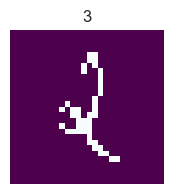

In [3]:
def plot_random_digit():
    random_index = np.random.randint(0,X_train.shape[0])
    print(random_index)
    plt.imshow(X_train[random_index], cmap='BuPu_r')
    plt.title(y_train[random_index])
    plt.axis("Off")
    
plt.figure(figsize=[2,2])
plot_random_digit()

In [4]:
X_train.shape[0:3]

(60000, 28, 28)

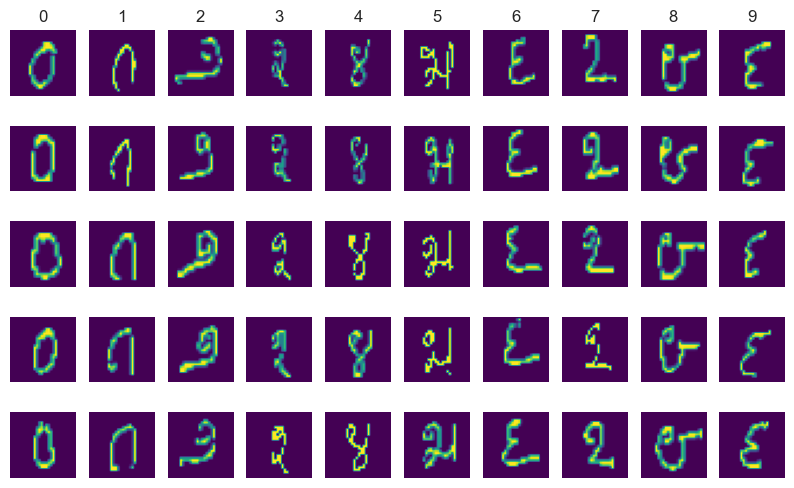

In [5]:
plt.figure(figsize=[10, 6])  # Set figure size to accommodate 10 rows
for i in range(50):
    plt.subplot(5, 10, i+1)  # Adjust to have 10 rows
    plt.axis('Off')
    if i < 10:
        plt.title(y_train[i])
    plt.imshow(X_train[i], cmap='viridis')


## 2. Perform PCA to 10 components. 

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
# X_train[0]

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
# X_test[0]

In [10]:
#  converting  two-dimensional array ( 28x28 pixel image) into a one-dimensional array (a vector).
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [11]:
X_train_flattened.shape

(60000, 784)

In [12]:
X_test_flattened.shape


(10000, 784)

In [13]:
# Perform PCA to 10 components
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_flattened)
X_test_pca = pca.transform(X_test_flattened)

In [14]:
X_train_pca.shape

(60000, 10)

In [15]:
X_test_pca[0]

array([ 279.3601266 , -604.63123887, -176.07301029, -322.23149172,
        749.39275067,  -77.97715556,  197.02783396,  239.16036685,
        455.15803079, -309.04902429])

## So now we have train and test images in 10 dimension instead of 28X28 dimension.

## 3. Now apply the the following models:
• Decision Trees
• Random forest
• Naive Bayes Model
• K-NN Classifier
• SVM

In [16]:
X_test_pca.shape


(10000, 10)

In [17]:
# # Decision Trees
# model = DecisionTreeClassifier()
# model.fit(X_train_pca,y_train)
# y_predicted = model.predict(X_test_pca)

# y_predicted

In [18]:
# # Random forest
# model = RandomForestClassifier()
# model.fit(X_train_pca,y_train)
# y_predicted=model.predict(X_test_pca)
# y_predicted

In [19]:
# # Naive Bayes Model
# model = GaussianNB()
# model.fit(X_train_pca,y_train)
# y_predicted=model.predict(X_test_pca)
# y_predicted


In [20]:
# # K-NN Classifier

# model = KNeighborsClassifier()
# model.fit(X_train_pca,y_train)
# y_predicted=model.predict(X_test_pca)
# y_predicted


In [21]:
# # SVM
# model=SVC()
# model.fit(X_train_pca,y_train)
# y_predicted=model.predict(X_test_pca)
# y_predicted

## 4. For each of this method produce the following metrics:
• Precision, Recall, F1 - Score
• Confusion Matrix
• RoC - AUC curve
## 5. Try to repeat the same experiment for different component size : 15,20,25,30

In [ ]:
model_names = ['Decision Trees', 'Random Forest', 'Naive Bayes', 'KNN', 'SVM']
component_sizes = [10, 15, 20, 25, 30]
ds_dir = "D:\\final project\\Kannada_MNIST\\kANNADA_MNIST"

X_train = np.load(os.path.join(ds_dir,'X_kannada_MNIST_train.npz'))['arr_0']
X_test = np.load(os.path.join(ds_dir,'X_kannada_MNIST_test.npz'))['arr_0']
y_train = np.load(os.path.join(ds_dir,'y_kannada_MNIST_train.npz'))['arr_0']
y_test = np.load(os.path.join(ds_dir,'y_kannada_MNIST_test.npz'))['arr_0']
precisions = {model: [] for model in model_names}
recalls = {model: [] for model in model_names}
f1_scores = {model: [] for model in model_names}

def get_classifier(model):
    if model == 'Decision Trees':
        return DecisionTreeClassifier()
    elif model == 'Random Forest':
        return RandomForestClassifier()
    elif model == 'Naive Bayes':
        return GaussianNB()
    elif model == 'KNN':
        return KNeighborsClassifier()
    elif model == 'SVM':
        return SVC()

def calculate_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    return precision, recall, f1

for size in component_sizes:
    pdf_files = []

    # Flatten the images
    X_train_flatten = X_train.reshape(X_train.shape[0], -1)
    X_test_flatten = X_test.reshape(X_test.shape[0], -1)

    # Perform PCA
    pca = PCA(n_components=size)
    X_train_pca = pca.fit_transform(X_train_flatten)
    X_test_pca = pca.transform(X_test_flatten)

    # Train and evaluate models
    for model in model_names:
        classifier = get_classifier(model)
        classifier.fit(X_train_pca, y_train)
        y_pred = classifier.predict(X_test_pca)

        # Calculate metrics
        precision, recall, f1 = calculate_metrics(y_test, y_pred)

        # Store metrics
        precisions[model].append(precision)
        recalls[model].append(recall)
        f1_scores[model].append(f1)

        # Generate metrics bar chart
        plt.figure(figsize=(8, 5))
        plt.bar(['Precision', 'Recall', 'F1-Score'], [precision, recall, f1])
        plt.ylim(0, 1)
        plt.title(f'Model Metrics - {model}')
        plt.xlabel('Metric')
        plt.ylabel('Value')
        

        # Generate confusion matrix heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
        plt.title(f'{model} - Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        

        # Generate ROC-AUC curve using Yellowbrick
        plt.figure(figsize=(10, 8))
        visualizer = ROCAUC(classifier, classes=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
        visualizer.fit(X_train_pca, y_train)
        visualizer.score(X_test_pca, y_test)
        

    # Create model comparison table
    model_list = []
    precision_list = []
    recall_list = []
    f1_list = []

    for model in model_names:
        model_list.append(model)
        precision_list.append(precisions[model][-1])
        recall_list.append(recalls[model][-1])
        f1_list.append(f1_scores[model][-1])
        

    metrics_df = pd.DataFrame({
        'Model': model_list,
        'Precision': precision_list,
        'Recall': recall_list,
        'F1-Score': f1_list})
    print(metrics_df)
    



            Model  Precision  Recall  F1-Score
0  Decision Trees   0.802155  0.8017  0.801185
1   Random Forest   0.876575  0.8737  0.872919
2     Naive Bayes   0.779046  0.7721  0.770717
3             KNN   0.882818  0.8795  0.878425
4             SVM   0.890448  0.8869  0.886359


C:\Users\hpworld\AppData\Local\Temp\ipykernel_12820\2547003529.py:75: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 8))


            Model  Precision  Recall  F1-Score
0  Decision Trees   0.807065  0.8071  0.806273
1   Random Forest   0.896113  0.8926  0.892052
2     Naive Bayes   0.787026  0.7836  0.782034
3             KNN   0.912316  0.9087  0.908089
4             SVM   0.916916  0.9144  0.913917
